# Practical example: Simple Linear Regression on Max/MinTemperature

Information is available regarding the weather conditions recorded each day at various weather
stations around the world. The information includes
- precipitation
- snowfall
- temperatures
- wind speed,
- and whether the day included thunderstorms
- or other bad weather conditions.

Our task is to predict the maximum temperature by using the minimum temperature as an input.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
#read data from csv using pandas library
dataset = pd.read_csv('Exercise_01_Summary_of_weather.csv')


<ipython-input-3-62966b3882b6>:2: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('Exercise_01_Summary_of_weather.csv')


In [4]:

#observe data and feaures of dataset
samples, features = dataset.shape

In [6]:
#obtain statistical info of features
statistical_data_info = dataset.describe()
print(statistical_data_info)

                 STA  WindGustSpd        MaxTemp        MinTemp  \
count  119040.000000   532.000000  119040.000000  119040.000000   
mean    29659.435795    37.774534      27.045111      17.789511   
std     20953.209402    10.297808       8.717817       8.334572   
min     10001.000000    18.520000     -33.333333     -38.333333   
25%     11801.000000    29.632000      25.555556      15.000000   
50%     22508.000000    37.040000      29.444444      21.111111   
75%     33501.000000    43.059000      31.666667      23.333333   
max     82506.000000    75.932000      50.000000      34.444444   

            MeanTemp             YR             MO             DA          DR  \
count  119040.000000  119040.000000  119040.000000  119040.000000  533.000000   
mean       22.411631      43.805284       6.726016      15.797530   26.998124   
std         8.297982       1.136718       3.425561       8.794541   15.221732   
min       -35.555556      40.000000       1.000000       1.000000    2.0

We will use only the data of interest to make a prediction of the maximum temperature as a function of the minimum temperature.


### SIMPLE LINEAR REGRESSION
## We choose to predict the Maximum temperature as a function of Minimum temperature

In [7]:

# Independent variables (inputs)
X = pd.DataFrame(dataset, columns=['MinTemp'])

# Output variables (y)
y = pd.DataFrame(dataset, columns=['MaxTemp'])

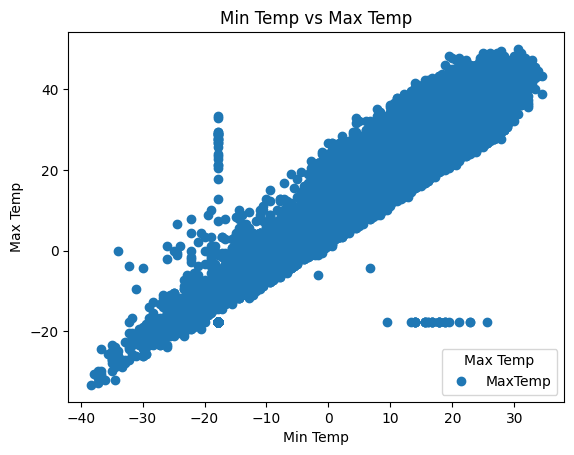

In [8]:
#Display Original Data
dataset.plot(x='MinTemp', y='MaxTemp',style='o')
plt.title('Min Temp vs Max Temp')
plt.xlabel('Min Temp')
plt.ylabel('Max Temp')
plt.legend(loc='lower right', title='Max Temp')
plt.show()

Then divide the extracted data for our model into train data, which is theoretically 80% of the total
dataset, and test data, which in this case is theoretically the remaining 20% of the dataset.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)


We can define the model we want, in this case by using a linear regression model with ordinary
least squares (OLS) estimation.

---

CREATE LINEAR REGRESSION MODEL WITH ERRORS DISTRIBUTED AS SHOWN
independently and identically distributed errors
 erros with heteroscedasticity or autocorrelation

 **OLS** = ordinary least squares estimation

In [10]:
regressor = LinearRegression()


In [11]:
# TRAIN THE MODEL with the data selected for train

regressor.fit(X_train, y_train)

LinearRegression()

We can see the coefficients of the model; since it is a simple linear regression, there is the
independent variable, +0 , and the slope, +1 , of the line that best approximates the available
dataset.

In [12]:
# Linear regression   Y = m* X + c

#Intercept
print('Independent term c: %.2f' %regressor.intercept_)

#to obtain the slope
print('Slope m: %.2f' % regressor.coef_)

Independent term c: 10.66
Slope m: 0.92


Independent variable: b0 = 10.66, and the slope, b1 = 0.92

With the model defined and its optimal coefficients calculated, we can predict the output values
using the test values of the inputs; in other words, we proceed to predict the maximum
temperature for a set of minimum temperatures.

In [13]:
# MODEL PREDICTIONS
y_pred = regressor.predict(X_test)
y_test = y_test.to_numpy()

Show a sample of the predicted values of the maximum temperature and the actual values of those same temperatures.

In [14]:
y_pred = y_pred.flatten()
y_test = y_test.flatten()

#difference between predicted and actual value
df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

print(df)

          Actual  Predicted
0      28.888889  33.670351
1      31.111111  30.091251
2      27.222222  26.512151
3      28.888889  31.113851
4      23.333333  15.774852
...          ...        ...
23803  32.777778  32.136451
23804  32.222222  29.068651
23805  31.111111  32.647751
23806  31.111111  30.602551
23807  36.666667  31.625151

[23808 rows x 2 columns]


Next, visualize the data

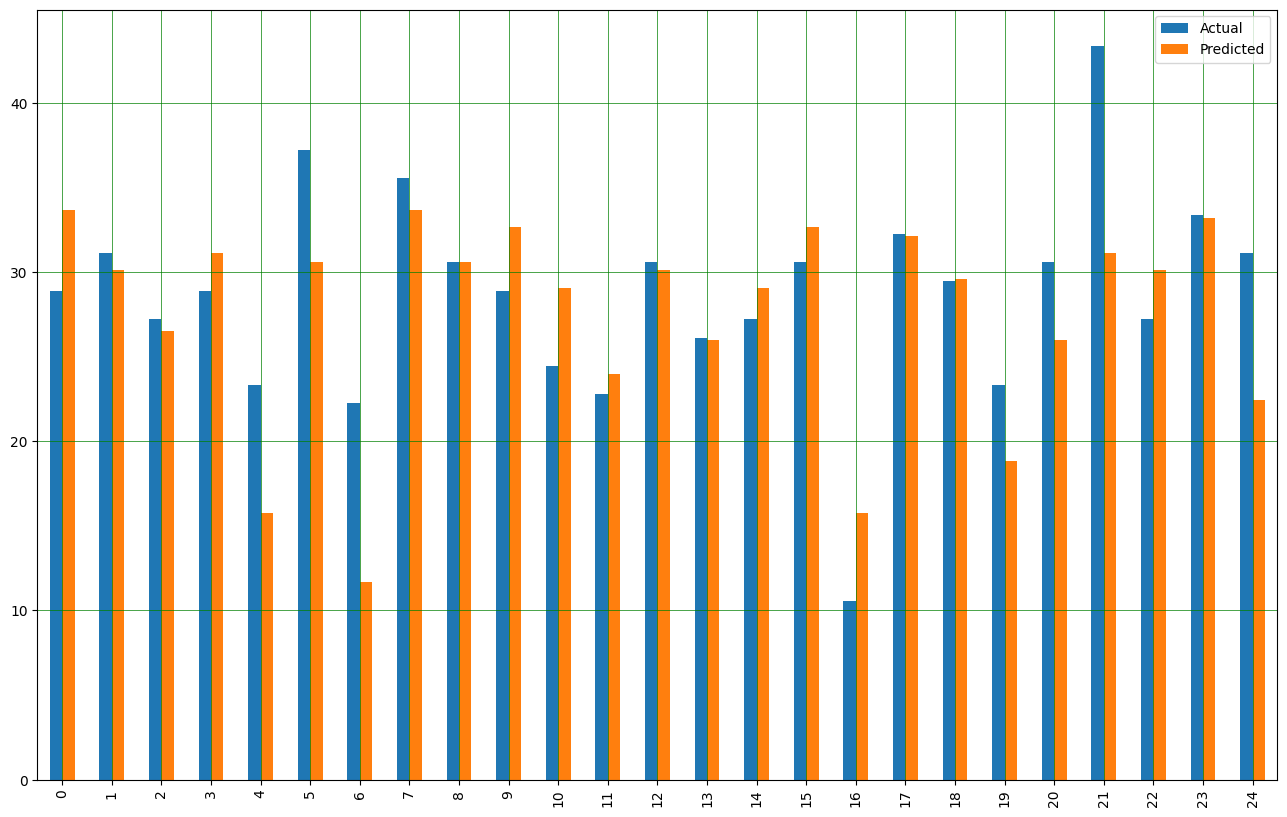

In [15]:
# VISUALIZE

#Draw best line
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()

Plot the test data along the line

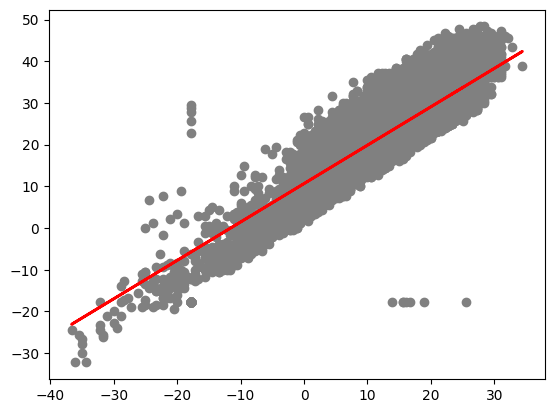

In [16]:
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red',linewidth=2)
plt.show()

Next, calculate the most significant metrics

In [17]:
# METRICS
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root mean square error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('Correlation coefficient:', metrics.r2_score(y_test,y_pred))


Mean Absolute Error: 3.19932917837853
Mean Squared Error: 17.631568097568447
Root mean square error: 4.198996082109204
Correlation coefficient: 0.7670218843587764


It can be seen that the Root Mean Square Error value is 4.19, which is more than 10% of the
mean value of the percentages of the whole temperature, which is 22.4, so this means that our
algorithm is not very accurate but it is still able to make reasonably good predictions.